In [2]:
from google.colab import files
uploaded = files.upload()

Saving souki_hedi.csv to souki_hedi.csv


In [3]:
# Load the dataset that we downloaded
df = pd.read_csv("souki_hedi.csv")

# Show first 5 rows
print(df.head())


   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0              39  ...          11914.0                 1.335   
1              44  ...           7

colonnes utiles :

Attrition_Flag
	Object	Client parti ou pas (cible binaire)
Customer_Age	Int	Pour voir si l’âge influence la fidélité
Gender, Education_Level, Income_Category, Card_Category	Catégorielles	Pour segmenter les profils

---


Total_Trans_Amt, Avg_Utilization_Ratio	Numérique	Mesure l’utilisation de la carte

/tmp/ipython-input-8-2408632040.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(             # Create a countplot (bar plot of counts)


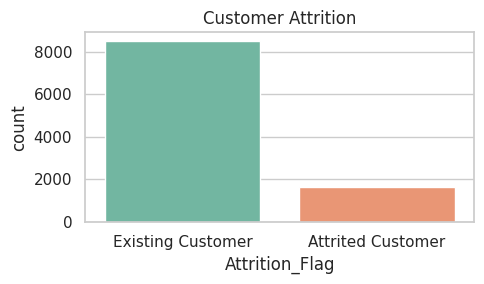

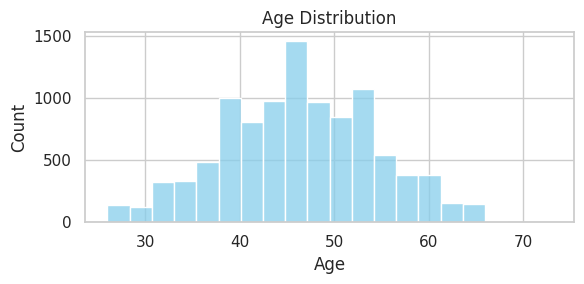

/tmp/ipython-input-8-2408632040.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(               # Create a boxplot to show data spread


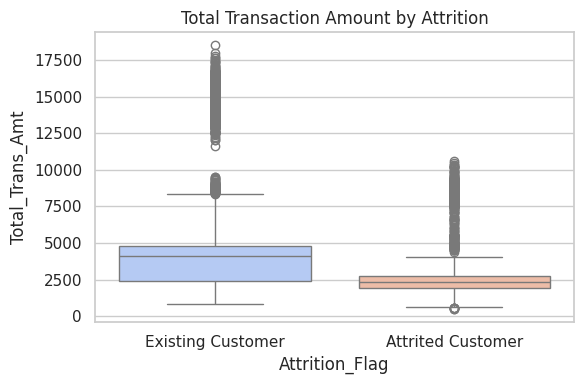

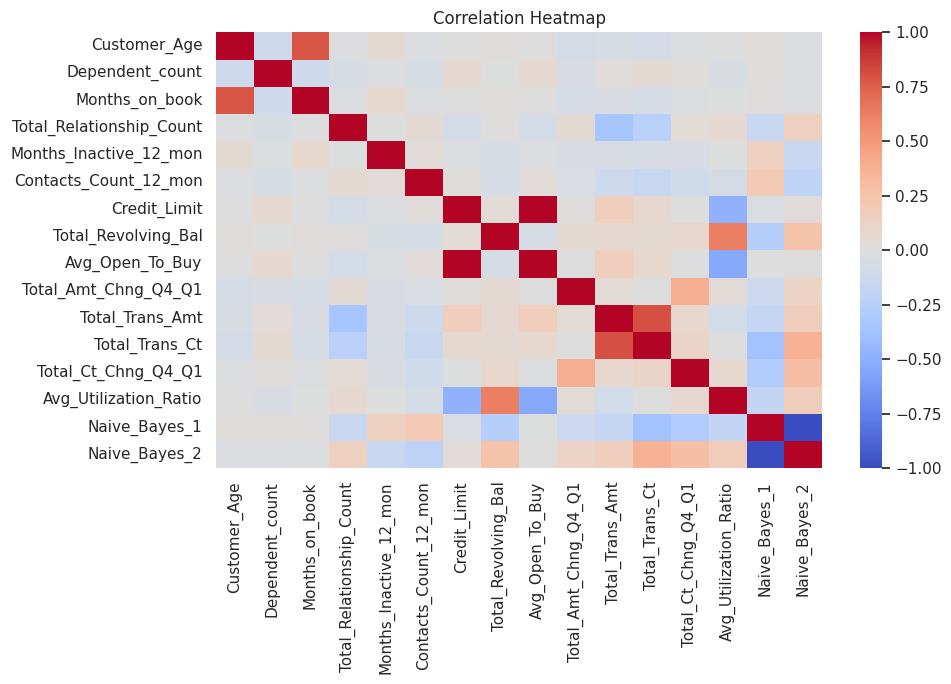

/tmp/ipython-input-8-2408632040.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(             # Create a countplot (bar chart of frequencies)


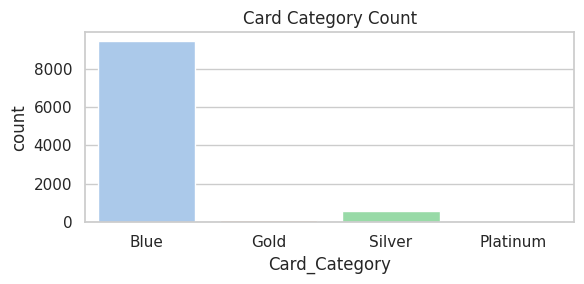

In [8]:
import pandas as pd              # Import pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import matplotlib to create visualizations and charts
import seaborn as sns            # Import seaborn for more attractive and simplified visualizations
import numpy as np               # Import numpy for numerical operations (not heavily used here but good to have)

# Load the dataset from the CSV file into a pandas DataFrame
df = pd.read_csv("souki_hedi.csv")

# Drop unnecessary columns that are empty or irrelevant (likely created during CSV export)
df = df.drop(columns=["Unnamed: 23", "Unnamed: 24"])

# Rename the last two long column names for better readability and easier access
df = df.rename(columns={
    df.columns[21]: "Naive_Bayes_1",  # Rename the 22nd column to Naive_Bayes_1
    df.columns[22]: "Naive_Bayes_2"   # Rename the 23rd column to Naive_Bayes_2
})

# Set a global plotting style using seaborn for consistent appearance (white background + gridlines)
sns.set(style="whitegrid")

#1. Count plot: Customer Attrition

plt.figure(figsize=(5,3))  # Create a new figure with width=5 and height=3 inches
sns.countplot(             # Create a countplot (bar plot of counts)
    x='Attrition_Flag',    # The x-axis will be the 'Attrition_Flag' column (customer left or stayed)
    data=df,               # Use the dataset 'df'
    palette='Set2'         # Use seaborn's 'Set2' color palette for nicer colors
)
plt.title('Customer Attrition')  # Add a title to the chart
plt.tight_layout()               # Adjust spacing to prevent label/title overlap
plt.show()                       # Display the chart

#2. Histogram: Customer Age Distribution

plt.figure(figsize=(6,3))  # Create a new figure with width=6 and height=3 inches
sns.histplot(              # Create a histogram to show age distribution
    df['Customer_Age'],    # Column to plot: 'Customer_Age'
    bins=20,               # Divide ages into 20 bins (intervals)
    kde=False,             # Disable KDE (smoothed curve) for a simpler histogram
    color='skyblue'        # Use a light blue color for the bars
)
plt.title('Age Distribution')  # Add a title to the histogram
plt.xlabel('Age')              # Label the x-axis as "Age"
plt.ylabel('Count')            # Label the y-axis as "Count" (number of customers)
plt.tight_layout()             # Adjust spacing to avoid overlaps
plt.show()                     # Display the histogram

#3. Boxplot: Total Transaction Amount vs Attrition

plt.figure(figsize=(6,4))  # Create a new figure with width=6 and height=4 inches
sns.boxplot(               # Create a boxplot to show data spread
    x='Attrition_Flag',    # X-axis: customer attrition status (stayed or left)
    y='Total_Trans_Amt',   # Y-axis: total transaction amount
    data=df,               # Use the dataset 'df'
    palette='coolwarm'     # Use the 'coolwarm' color palette for contrasting colors
)
plt.title('Total Transaction Amount by Attrition')  # Add title explaining what’s shown
plt.tight_layout()         # Adjust layout to fit everything nicely
plt.show()                 # Display the boxplot

#4. Heatmap: Correlation Between Numeric Features

plt.figure(figsize=(10,7))                  # Create a larger figure (10x7 inches) for the heatmap
num_df = df.select_dtypes(                  # Create a new DataFrame with only numeric columns
    include=['float64', 'int64']            # Include only float and integer columns
).drop(columns=["CLIENTNUM"])               # Drop 'CLIENTNUM' because it’s just an ID, not useful for correlations

corr = num_df.corr()                        # Calculate the correlation matrix between all numeric variables

sns.heatmap(                                # Create a heatmap to visualize correlations
    corr,                                   # Pass the correlation matrix
    annot=False,                            # Do NOT annotate cells with correlation numbers (just show colors)
    cmap='coolwarm'                         # Use a diverging 'coolwarm' color palette for positive/negative correlation
)
plt.title('Correlation Heatmap')            # Add a title to the heatmap
plt.tight_layout()                          # Adjust layout to fit everything nicely
plt.show()                                  # Display the heatmap

#5. Count plot: Card Category Distribution

plt.figure(figsize=(6,3))  # Create a new figure with width=6 and height=3 inches
sns.countplot(             # Create a countplot (bar chart of frequencies)
    x='Card_Category',     # X-axis: card category (e.g., Blue, Silver, Gold, etc.)
    data=df,               # Use the dataset 'df'
    palette='pastel'       # Use a soft pastel color palette for aesthetics
)
plt.title('Card Category Count')  # Add a title explaining the chart
plt.tight_layout()                # Adjust layout so labels/titles don’t overlap
plt.show()                        # Display the countplot
